In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# tools
import cv2

import time

import pandas as pd
import os

from PIL import Image, ImageOps

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
img_width = 1280
img_height = 720

# Define the classes
classes = ["Accident", "NonAccident"]

In [4]:
def load_images(dataset_folder, classes, model_path, img_width, img_height, padding=False):
    # Initialize lists to store true labels and predicted labels
    y_true = []
    y_pred = []
    y_pred_proba = []

    # Iterate over the images in the dataset folder
    for class_name in classes:
        class_folder = os.path.join(dataset_folder, class_name)
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            
            # If images have the same size
            if padding == False:
                # Load and preprocess the image
                image = preprocess_image(image_path, img_height, img_width)
             
            # If images have different sizes we use padding
            elif padding == True:
                # Load and preprocess the image with pad
                image = preprocess_image(image_path, img_height, img_width, padding)
                
            # Append true and predicted labels to the respective lists
            true_label = classes.index(class_name)
            y_true.append(true_label)

            y_prediction, y_prediction_proba = predict_image(image, model_path)

            y_pred.append(y_prediction)
            y_pred_proba.append(y_prediction_proba)
                

    return y_true, y_pred, y_pred_proba

def preprocess_image(image_path, img_height, img_width, padding=False):
    if padding == False:
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = np.expand_dims(image, axis=0)  
    elif padding == True:
        image = Image.open(image_path)
        current_width, current_height = image.size
        
        desired_width = img_width
        desired_height = img_height
        
        # Calculate the required padding size
        padding_width = max(desired_width - current_width, 0)
        padding_height = max(desired_height - current_height, 0)
        
        # Add padding to the image
        padding = (padding_width // 2, padding_height // 2, padding_width - (padding_width // 2), padding_height - (padding_height // 2))
        padded_image = ImageOps.expand(image, padding)
        
        # Resize the padded image to the desired size
        resized_image = padded_image.resize((desired_width, desired_height))
        
        image = tf.keras.preprocessing.image.img_to_array(resized_image)
        image = np.expand_dims(image, axis=0)
    
    return image

def predict_image(image, model_path):
    # Load the trained model
    model = load_model(model_path)

    # Make predictions
    predictions_proba = model.predict(image, verbose=0)
    predicted_class = np.argmax(predictions_proba)

    return predicted_class, predictions_proba


def visualize_confusion_matrix(y_true, y_pred, classes):
    # Create a confusion matrix
    confusion = confusion_matrix(y_true, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(7,6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

#### Test GT

In [5]:
# Define the path to your dataset folder
dataset_folder = "datav3_testing/"
model_path = 'model/modelx_GT_1280x720_best.h5'

# Load and predict images, and obtain true and predicted labels
y_trueGT, y_predGT, y_predGT_proba = load_images(dataset_folder, classes, model_path, img_width, img_height)

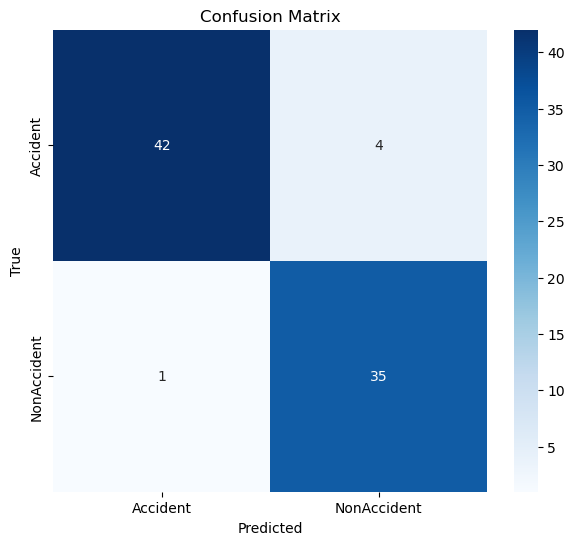

In [6]:
# Visualize the confusion matrix
visualize_confusion_matrix(y_trueGT, y_predGT, classes)

In [7]:
print(classification_report(y_trueGT, y_predGT))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.90      0.97      0.93        36

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



#### Test x2

In [8]:
# Define the path to your dataset folder
dataset_folder = "datav3_testing_LRX2_SR/"
model_path = 'model/modelx_GT_1280x720_best.h5'

# Load and predict images, and obtain true and predicted labels
y_trueX2, y_predX2, y_predX2_proba = load_images(dataset_folder, classes, model_path, img_width, img_height)

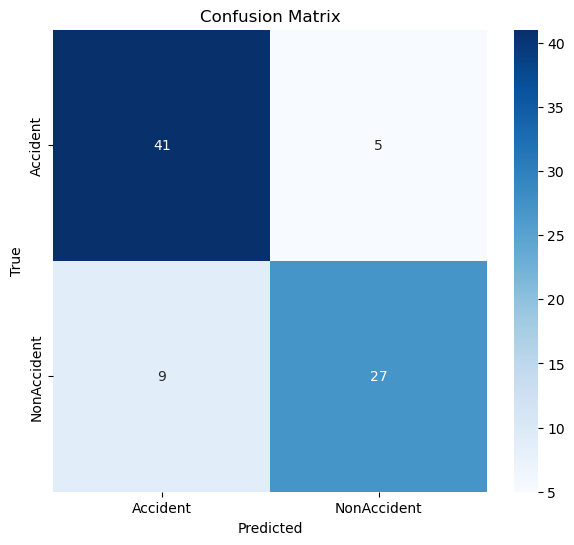

In [9]:
# Visualize the confusion matrix
visualize_confusion_matrix(y_trueX2, y_predX2, classes)

In [10]:
print(classification_report(y_trueX2, y_predX2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        46
           1       0.84      0.75      0.79        36

    accuracy                           0.83        82
   macro avg       0.83      0.82      0.82        82
weighted avg       0.83      0.83      0.83        82



In [11]:
accuracy_score(y_trueX2, y_predX2)

0.8292682926829268

In [12]:
41/50

0.82

In [13]:
27/32

0.84375

In [14]:
(82+84)/2

83.0

#### Test x4

In [15]:
# Define the path to your dataset folder
dataset_folder = "datav3_testing_LRX4_SR/"
model_path = 'model/modelx_GT_1280x720_best.h5'

# Load and predict images, and obtain true and predicted labels
y_trueX4, y_predX4, y_predX4_proba = load_images(dataset_folder, classes, model_path, img_width, img_height)

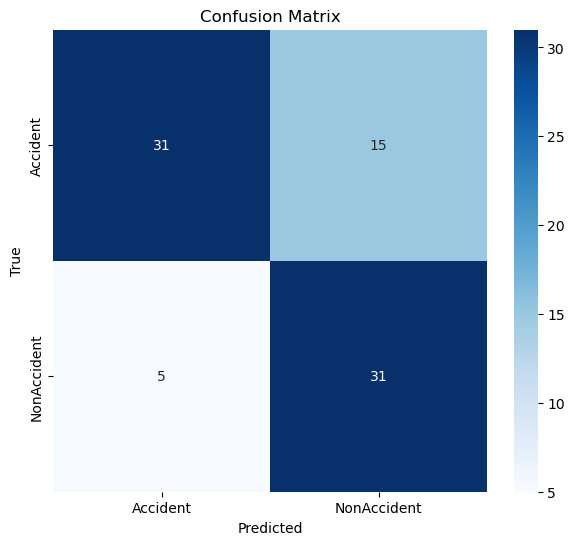

In [16]:
# Visualize the confusion matrix
visualize_confusion_matrix(y_trueX4, y_predX4, classes)

In [17]:
print(classification_report(y_trueX4, y_predX4))

              precision    recall  f1-score   support

           0       0.86      0.67      0.76        46
           1       0.67      0.86      0.76        36

    accuracy                           0.76        82
   macro avg       0.77      0.77      0.76        82
weighted avg       0.78      0.76      0.76        82



In [18]:
accuracy_score(y_trueX4, y_predX4)

0.7560975609756098

In [19]:
31/46

0.6739130434782609

#### Test X8

In [20]:
# Define the path to your dataset folder
dataset_folder = "datav3_testing_LRX8_SR/"
model_path = 'model/modelx_GT_1280x720_best.h5'

# Load and predict images, and obtain true and predicted labels
y_trueX8, y_predX8, y_predX8_proba = load_images(dataset_folder, classes, model_path, img_width, img_height)

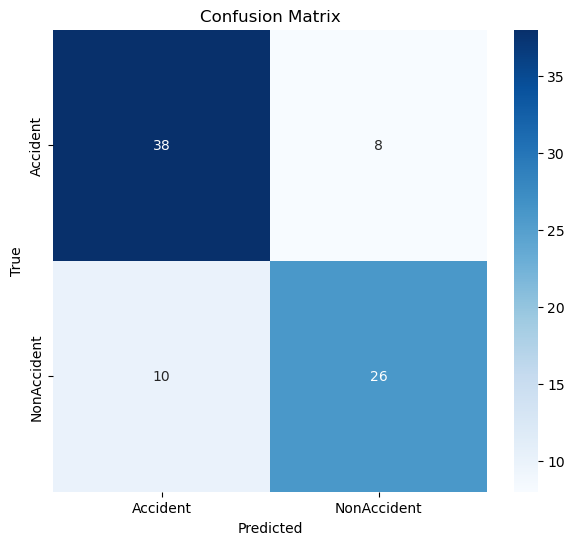

In [21]:
# Visualize the confusion matrix
visualize_confusion_matrix(y_trueX8, y_predX8, classes)

In [22]:
print(classification_report(y_trueX8, y_predX8))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        46
           1       0.76      0.72      0.74        36

    accuracy                           0.78        82
   macro avg       0.78      0.77      0.78        82
weighted avg       0.78      0.78      0.78        82



### ROC Curve (V2)

In [23]:
y_truelist = [y_trueGT, y_trueX2, y_trueX4, y_trueX8]
y_predlist = [y_predGT_proba, y_predX2_proba, y_predX4_proba, y_predX8_proba]
model_names = ['GT', 'LRx2', 'LRx4', 'LRx8']

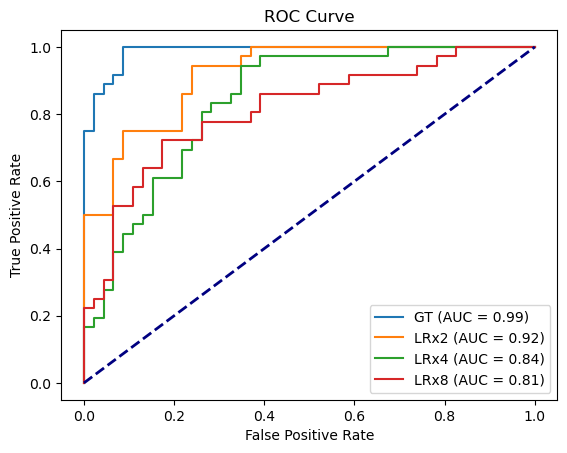

In [24]:
# Initialize an empty figure
plt.figure()

# Iterate over each category
for i in range(len(y_truelist)):
    # keep probabilities for the positive outcome only
    positive_probs = [item[0][1] for item in y_predlist[i]]
    
    # Compute the false positive rate, true positive rate, and threshold for each category
    fpr, tpr, _ = roc_curve(y_truelist[i], positive_probs)
    
    # Compute the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for each category
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_names[i], roc_auc))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Show the plot
plt.show()

### ROC Curve

In [29]:
y_truelist = [y_trueGT, y_trueX2, y_trueX4, y_trueX8]
y_predlist = [y_predGT, y_predX2, y_predX4, y_predX8]
model_names = ['GT', 'LRx2', 'LRx4', 'LRx8']

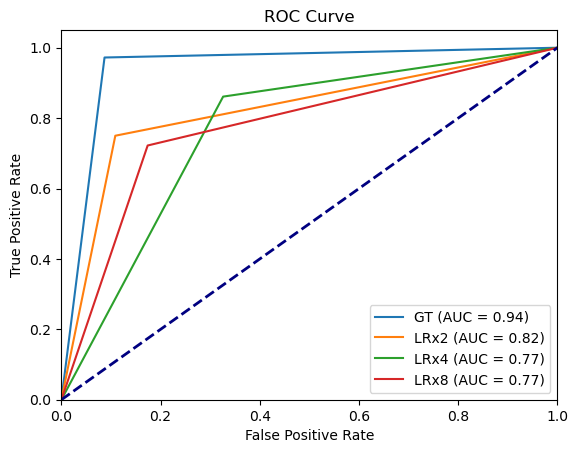

In [45]:
# Initialize an empty figure
plt.figure()

# Iterate over each category
for i in range(len(y_truelist)):
    # Compute the false positive rate, true positive rate, and threshold for each category
    fpr, tpr, thresholds = roc_curve(y_truelist[i], y_predlist[i])
    
    # Compute the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for each category
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_names[i], roc_auc))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Show the plot
plt.show()

### Validation (LR)

#### LRx2

In [12]:
# Define the path to your dataset folder
dataset_folder = "datav3_testing_LRX2/"
model_path = 'model/modelx_GT_1280x720_best.h5'
padding = True

# Load and predict images, and obtain true and predicted labels
y_trueLRX2, y_predLRX2, y_predLRX2_proba = load_images(dataset_folder, classes, model_path, img_width, img_height, padding)

In [13]:
print(classification_report(y_trueLRX2, y_predLRX2))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        46
           1       0.40      0.56      0.47        36

    accuracy                           0.44        82
   macro avg       0.45      0.45      0.44        82
weighted avg       0.46      0.44      0.43        82



#### LRX4

In [20]:
# Define the path to your dataset folder
dataset_folder = "datav3_testing_LRX4/"
model_path = 'model/modelx_GT_1280x720_best.h5'
padding = True

# Load and predict images, and obtain true and predicted labels
y_trueLRX4, y_predLRX4, y_predLRX4_proba = load_images(dataset_folder, classes, model_path, img_width, img_height, padding)

In [21]:
print(classification_report(y_trueLRX4, y_predLRX4))

              precision    recall  f1-score   support

           0       0.53      0.41      0.46        46
           1       0.41      0.53      0.46        36

    accuracy                           0.46        82
   macro avg       0.47      0.47      0.46        82
weighted avg       0.48      0.46      0.46        82



#### LRX8

In [16]:
# Define the path to your dataset folder
dataset_folder = "datav3_testing_LRX8/"
model_path = 'model/modelx_GT_1280x720_best.h5'
padding = True

# Load and predict images, and obtain true and predicted labels
y_trueLRX8, y_predLRX8, y_predLRX8_proba = load_images(dataset_folder, classes, model_path, img_width, img_height, padding)

In [19]:
print(classification_report(y_trueLRX8, y_predLRX8))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71        46
           1       0.00      0.00      0.00        36

    accuracy                           0.55        82
   macro avg       0.28      0.49      0.35        82
weighted avg       0.31      0.55      0.40        82



#### ROC Curve (LR Padding)

In [24]:
y_truelist = [y_trueLRX2, y_trueLRX4, y_trueLRX8]
y_predlist = [y_predLRX2_proba, y_predLRX4_proba, y_predLRX8_proba]
model_names = ['LRx2', 'LRx4', 'LRx8']

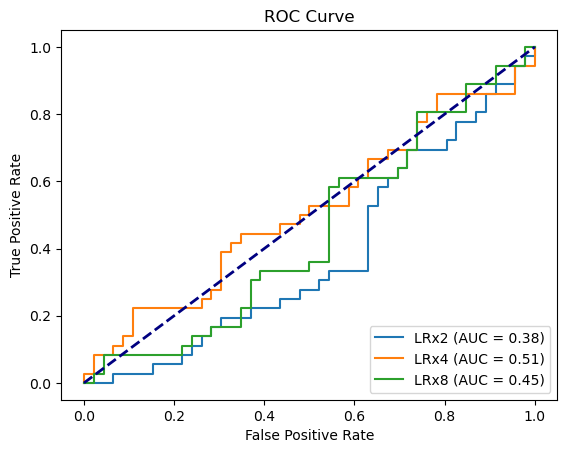

In [25]:
# Initialize an empty figure
plt.figure()

# Iterate over each category
for i in range(len(y_truelist)):
    # keep probabilities for the positive outcome only
    positive_probs = [item[0][1] for item in y_predlist[i]]
    
    # Compute the false positive rate, true positive rate, and threshold for each category
    fpr, tpr, _ = roc_curve(y_truelist[i], positive_probs)
    
    # Compute the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for each category
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_names[i], roc_auc))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Show the plot
plt.show()

### ROC Curve SR and LR

In [34]:
y_truelist = [y_trueGT, y_trueX2, y_trueX4, y_trueX8, y_trueLRX4, y_trueLRX8, y_trueLRX2]
y_predlist = [y_predGT_proba, y_predX2_proba, y_predX4_proba, y_predX8_proba, y_predLRX4_proba, y_predLRX8_proba, y_predLRX2_proba]
model_names = ['GT', 'SRx2', 'SRx4', 'SRx8', 'LRx4', 'LRx8', 'LRx2']

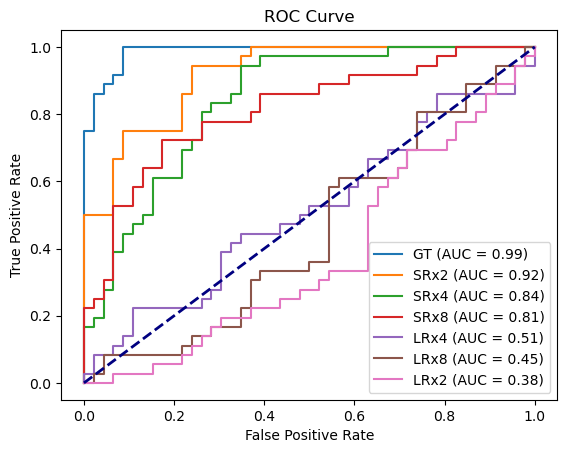

In [35]:
# Initialize an empty figure
plt.figure()

# Iterate over each category
for i in range(len(y_truelist)):
    # keep probabilities for the positive outcome only
    positive_probs = [item[0][1] for item in y_predlist[i]]
    
    # Compute the false positive rate, true positive rate, and threshold for each category
    fpr, tpr, _ = roc_curve(y_truelist[i], positive_probs)
    
    # Compute the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for each category
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_names[i], roc_auc))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Show the plot
plt.show()

#### Experiment

In [31]:
positive_probs = [item[0][1] for item in y_predX8_proba]
positive_probs

[0.0008698613,
 1.8868908e-06,
 0.49956006,
 0.00010797447,
 0.4230431,
 5.3803302e-05,
 0.0097409375,
 4.3165107e-09,
 6.044465e-11,
 0.98320895,
 0.76371306,
 0.07628796,
 7.5465255e-07,
 7.294779e-06,
 6.57394e-05,
 0.16560297,
 0.0073166876,
 4.168091e-18,
 1.6505607e-09,
 0.9999219,
 0.99937004,
 2.0634427e-07,
 0.0098263575,
 8.455233e-06,
 0.006613269,
 0.00045347997,
 0.4350404,
 8.153783e-05,
 0.23615074,
 0.8503828,
 0.9074528,
 0.9750709,
 0.10080733,
 0.008351177,
 0.10731074,
 1.3867896e-06,
 0.00020563493,
 3.8095544e-09,
 0.0014813917,
 0.999632,
 0.29172152,
 0.19486618,
 0.023825163,
 2.2416469e-05,
 0.0033326596,
 1.0576621e-07,
 0.66752225,
 1.0,
 1.0,
 0.042116065,
 0.9999527,
 0.99953973,
 1.2136586e-05,
 1.0,
 0.89480364,
 0.75868744,
 0.9992555,
 2.3355287e-06,
 0.08180032,
 1.1857907e-06,
 0.0008276363,
 0.9928558,
 0.9724372,
 0.02488088,
 0.9987545,
 0.9975458,
 0.9664366,
 0.997717,
 0.8926172,
 0.99913365,
 0.9999757,
 0.75828373,
 0.990956,
 0.2769818,
 0.9